In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import re
import string
import tensorflow as tf
from tensorflow.keras import preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords

In [59]:
train_data = pd.read_csv("data\\train.csv")
test_data = pd.read_csv("data\\test.csv")
sample_sub=pd.read_csv("data\\sample_submission.csv")

In [3]:
train_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
test_data

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [5]:
#checking dimensionality of the train and test dataSet
rows_train, cols_train = train_data.shape
print('\033[1m' + "Train Dataset :" + '\033[0m')
print(f'\tThe no.of rows = {rows_train}')
print(f'\tThe no.of columns = {cols_train}')
print('-'*50)
rows_test, cols_test = test_data.shape
print('\033[1m' + "Test Dataset :" + '\033[0m')
print(f'\tThe no.of rows = {rows_test}')
print(f'\tThe no.of columns = {cols_test}')

Train Dataset :
	The no.of rows = 7613
	The no.of columns = 5
--------------------------------------------------
Test Dataset :
	The no.of rows = 3263
	The no.of columns = 4


In [6]:
#Checking for sum of null values present in both train and test datset.
print('\033[1m' + "Sum of NULL values in Train dataSet:" + '\033[0m')
print(train_data.isnull().sum())
print('-'*20)
print('\033[1m' + "Sum of NULL values in Test dataSet:" + '\033[0m')
print(test_data.isnull().sum())

Sum of NULL values in Train dataSet:
id             0
keyword       61
location    2533
text           0
target         0
dtype: int64
--------------------
Sum of NULL values in Test dataSet:
id             0
keyword       26
location    1105
text           0
dtype: int64


In [7]:
#Dropping 'keyword' and 'location' columns in both train and test dataset
train_data.drop(['keyword', 'location'], axis=1, inplace = True)

test_data.drop(['keyword', 'location'], axis=1, inplace = True)

C:\Users\Mehmet\.conda\envs\tf2\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'samples')

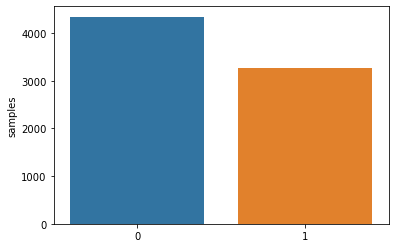

In [8]:
x=train_data.target.value_counts()
sbn.barplot(x.index,x)
plt.gca().set_ylabel('samples')

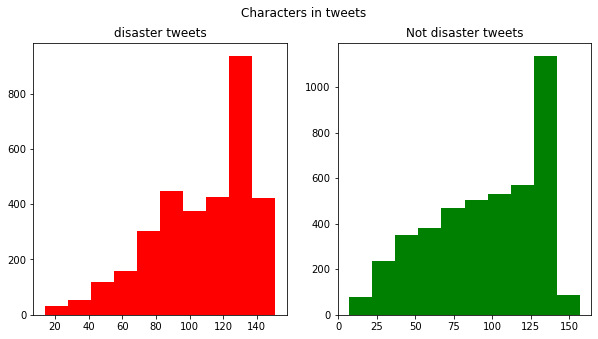

In [9]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_len=train_data[train_data['target']==1]['text'].str.len()
ax1.hist(tweet_len,color='red')
ax1.set_title('disaster tweets')
tweet_len=train_data[train_data['target']==0]['text'].str.len()
ax2.hist(tweet_len,color='green')
ax2.set_title('Not disaster tweets')
fig.suptitle('Characters in tweets')
plt.show()

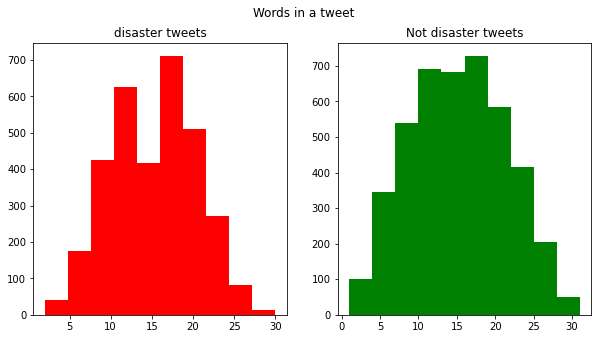

In [10]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_len=train_data[train_data['target']==1]['text'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len,color='red')
ax1.set_title('disaster tweets')
tweet_len=train_data[train_data['target']==0]['text'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len,color='green')
ax2.set_title('Not disaster tweets')
fig.suptitle('Words in a tweet')
plt.show()

C:\Users\Mehmet\.conda\envs\tf2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Mehmet\.conda\envs\tf2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0.98, 'Average word length in each tweet')

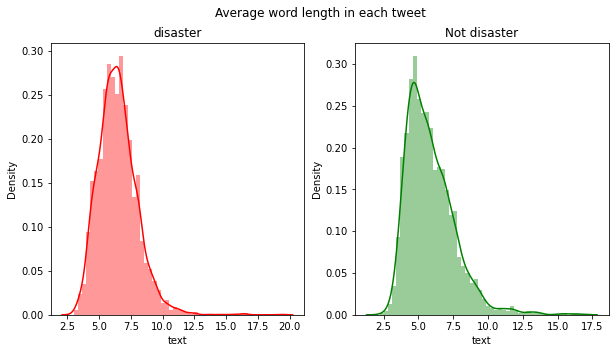

In [11]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
word=train_data[train_data['target']==1]['text'].str.split().apply(lambda x : [len(i) for i in x])
sbn.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('disaster')
word=train_data[train_data['target']==0]['text'].str.split().apply(lambda x : [len(i) for i in x])
sbn.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('Not disaster')
fig.suptitle('Average word length in each tweet')

In [12]:
df=train_data
df.shape

(7613, 3)

In [13]:
#removing url in tweets
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

In [14]:
df['text']=df['text'].apply(lambda x : remove_URL(x))

In [15]:
#removing html tags in tweets
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

In [16]:
df['text']=df['text'].apply(lambda x : remove_html(x))

In [17]:
#removing emojis Reference : https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [18]:
df['text']=df['text'].apply(lambda x: remove_emoji(x))

In [19]:
#removing punctuation
def remove_punct(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)

In [20]:
df['text']=df['text'].apply(lambda x : remove_punct(x))

In [21]:
#remove stopwords
def remove_stopwords(text):
    clean_sentence=[]
    for word in text.lower().split():
        if word.lower() not in stopwords.words('english'):
            clean_sentence.append(word.lower())
    return " ".join(clean_sentence)

In [22]:
df.head()

,id,text,target
0,1,Our Deeds are the Reason of this earthquake Ma...,1
1,4,Forest fire near La Ronge Sask Canada,1
2,5,All residents asked to shelter in place are be...,1
3,6,13000 people receive wildfires evacuation orde...,1
4,7,Just got sent this photo from Ruby Alaska as s...,1


In [23]:
df['text']=df['text'].apply(lambda x : remove_stopwords(x))

In [24]:
df.head()

,id,text,target
0,1,deeds reason earthquake may allah forgive us,1
1,4,forest fire near la ronge sask canada,1
2,5,residents asked shelter place notified officer...,1
3,6,13000 people receive wildfires evacuation orde...,1
4,7,got sent photo ruby alaska smoke wildfires pou...,1


In [25]:
#test and train splitting
(x_train,x_test,y_train,y_test)= train_test_split(df["text"].values,df["target"].values,test_size =0.3,random_state =10)

In [26]:
#building tokenizing
MAX_LENGTH = 50
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(x_train)#only providing train values to tokenizer
word_index= tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(x_train)
training_padded = pad_sequences(training_sequences,maxlen=MAX_LENGTH,padding="post",truncating="post")

test_sequences = tokenizer.texts_to_sequences(x_test)
test_padded = pad_sequences(test_sequences,maxlen=MAX_LENGTH,padding="post",truncating="post")

In [27]:
vocab_size=len(word_index)+1
#embedding_dim = training_padded.shape

In [28]:
training_padded.shape

(5329, 50)

In [29]:
#building model

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,100,input_length=MAX_LENGTH),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 100)           1434900   
_________________________________________________________________
global_average_pooling1d (Gl (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                6464      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 1,445,589
Trainable params: 1,445,589
Non-trainable params: 0
_________________________________________________________________


In [31]:
num_epoch = 15

history = model.fit(x=training_padded,y=y_train,epochs=num_epoch,validation_data=(test_padded,y_test),verbose=2)

Train on 5329 samples, validate on 2284 samples
Epoch 1/15
5329/5329 - 8s - loss: 0.6640 - accuracy: 0.5937 - val_loss: 0.5701 - val_accuracy: 0.7811
Epoch 2/15
5329/5329 - 8s - loss: 0.3945 - accuracy: 0.8390 - val_loss: 0.5282 - val_accuracy: 0.7360
Epoch 3/15
5329/5329 - 7s - loss: 0.2203 - accuracy: 0.9193 - val_loss: 0.5142 - val_accuracy: 0.7955
Epoch 4/15
5329/5329 - 7s - loss: 0.1348 - accuracy: 0.9521 - val_loss: 0.6373 - val_accuracy: 0.7491
Epoch 5/15
5329/5329 - 7s - loss: 0.0952 - accuracy: 0.9679 - val_loss: 0.6678 - val_accuracy: 0.7881
Epoch 6/15
5329/5329 - 7s - loss: 0.0737 - accuracy: 0.9745 - val_loss: 0.7138 - val_accuracy: 0.7863
Epoch 7/15
5329/5329 - 7s - loss: 0.0608 - accuracy: 0.9792 - val_loss: 0.7616 - val_accuracy: 0.7693
Epoch 8/15
5329/5329 - 7s - loss: 0.0588 - accuracy: 0.9792 - val_loss: 0.8001 - val_accuracy: 0.7837
Epoch 9/15
5329/5329 - 7s - loss: 0.0561 - accuracy: 0.9794 - val_loss: 0.8357 - val_accuracy: 0.7855
Epoch 10/15
5329/5329 - 7s - loss:

In [32]:
lossHistory = pd.DataFrame(model.history.history)

<AxesSubplot:>

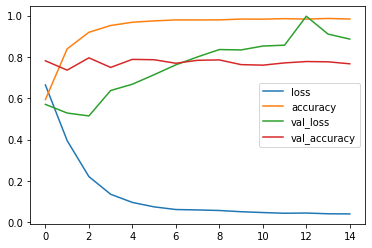

In [33]:
lossHistory.plot()

In [48]:
test_data.head()

,id,text
0,0,Just happened a terrible car crash
1,2,"Heard about #earthquake is different cities, s..."
2,3,"there is a forest fire at spot pond, geese are..."
3,9,Apocalypse lighting. #Spokane #wildfires
4,11,Typhoon Soudelor kills 28 in China and Taiwan


In [49]:
###submission
#removing url,html,emoji,punct and stopwords
test_data["text"]=test_data['text'].apply(lambda x : remove_URL(x))
test_data['text']=test_data['text'].apply(lambda x : remove_html(x))
test_data['text']=test_data['text'].apply(lambda x: remove_emoji(x))
test_data['text']=test_data['text'].apply(lambda x : remove_punct(x))
test_data['text']=test_data['text'].apply(lambda x : remove_stopwords(x))

In [50]:
#padding test data
t_sequences = tokenizer.texts_to_sequences(test_data["text"].values)
t_padded = pad_sequences(t_sequences,maxlen=MAX_LENGTH,padding="post",truncating="post")

In [56]:
predicts = model.predict(t_padded)
predicts

array([[0.88580865],
       [0.26479024],
       [0.9975198 ],
       ...,
       [0.99434364],
       [0.99577975],
       [0.960235  ]], dtype=float32)

In [57]:
predicts=np.round(predicts).astype(int).reshape(3263)

In [60]:
submission=pd.DataFrame({'id':sample_sub['id'].values.tolist(),'target':predicts})
submission.to_csv('data\\submission.csv',index=False)